In [1]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from itertools import product, repeat
plt.style.use("ggplot")
get_ipython().magic('matplotlib inline')

In [2]:
def check(a):
    for i in a: 
        if abs(i[0] > 1.5*box) or abs(i[1] > 1.5*box): return 0
    else: return 1

In [3]:
def check_howmany(a, box):
    result = 0
    for i in a: 
        if abs(i[0] > 1.5*box) or abs(i[1] > 1.5*box): result += 1
    return result/a.shape[0]
    


## discretize a point in a (3,3) matrix

In [4]:
def findquadrant(point,size):
    y,x = point
    halfsize = size/2
    if x < -halfsize:
        if y > halfsize: return [0,0]
        if y < -halfsize: return [2,0]
        return [1,0]
    if x > halfsize:
        if y > halfsize: return [0,2]
        if y < -halfsize: return [2,2]
        return [1,2]
    if y > halfsize: return [0,1]
    if y < -halfsize: return [2,1]
    return [1,1]

In [5]:
def findStep(points, box):
    tempo = 0
    while check_howmany(points, box) < 0.05:
        for i in points:
            a = uniform(0, 2*pi)
            vvar, hvar = V*dt*sin(a), V*dt*cos(a)
            i[0] += vvar; i[1] += hvar
        tempo += dt
    return tempo
    

## randomwalk each point for 1 day equivalent

In [6]:
def randomWalk(points, nonacessquadrants, time):
    dt = 1
    for atime in range(time):
        for i in points:
            a = uniform(0, 2*pi)
            vvar, hvar = V*dt*sin(a), V*dt*cos(a)
            i[0] += vvar; i[1] += hvar
            #if findquadrant(i, size) in nonacessquadrants: i[0] -= 2*vvar    
            #if findquadrant(i, size) in nonacessquadrants: i[0] += 2*vvar; i[1] -= 2*hvar
            #if findquadrant(i, size) in nonacessquadrants: i[0] -= 2*vvar
    return points


## make a grid from a scatter of many points

In [7]:
def gridify(somelist, size):
    shape = (3,3)
    grid = np.zeros(shape)
    for point in somelist:
        quadrant = findquadrant(point,size)
        grid[quadrant[0]][quadrant[1]] += 1
    grid = grid/grid.sum()
    return np.array(grid)


In [8]:
V = 300/60 #meters per minute
dt = 1 #min
npoints = 40000
size = 68
def newpoints(n):
    return np.array([[uniform(-size/2,size/2),uniform(-size/2,size/2)] for i in range(n)])

## Find maximum time step without leaking mosquitos from the 3x3 grid

In [9]:
%%time
def MaxStep(box):
    a = 0
    for i in range(7):
        a += findStep(newpoints(npoints), box)
    a = a/5
    for i in range(int(a),0, -1):
        if 24*60 % i == 0: return i
    return("deu ruim")

b= MaxStep(68.66)
a = 24*60/b
print(a)


6.0
CPU times: user 7min 14s, sys: 284 ms, total: 7min 14s
Wall time: 7min 15s


matrix generator for geting all possible combinations of matrix
<pre>
0 | 3 | 5 
1 | X | 6 
2 | 4 | 7
</pre>

In [10]:
%%time
allmatrices = list(product(*(repeat((0, 1), 8))))
print(len(allmatrices))
dictionary_matrix_to_num = {}
dict_num_to_weights = {}
nowalls = gridify(randomWalk(newpoints(npoints), [], MaxStep(68.66)), size)
avgcorner = (nowalls[0,0]+nowalls[2,2]+nowalls[2,0]+nowalls[0,2])/4 
avgwall = (nowalls[1,0]+nowalls[0,1]+nowalls[2,1]+nowalls[1,2])/4 
nowalls[0,0], nowalls[2,2], nowalls[2,0], nowalls[0,2] = [avgcorner for i in range(4)]
nowalls[1,0], nowalls[0,1], nowalls[2,1], nowalls[1,2] = [avgwall   for i in range(4)]
print(nowalls)
for index, case in enumerate(allmatrices):
    dictionary_matrix_to_num[case] = index
    multiplier = np.ones((3,3))
    if case[0] == 1: multiplier[0,0] = 0
    if case[1] == 1: multiplier[1,0] = 0
    if case[2] == 1: multiplier[2,0] = 0
    if case[3] == 1: multiplier[0,1] = 0
    if case[4] == 1: multiplier[2,1] = 0
    if case[5] == 1: multiplier[0,2] = 0
    if case[6] == 1: multiplier[1,2] = 0
    if case[7] == 1: multiplier[2,2] = 0
    if index%25 == 0: print(index, case)
    dict_num_to_weights[index] = nowalls*multiplier/(nowalls*multiplier).sum()
    

256
[[ 0.078475   0.1236375  0.078475 ]
 [ 0.1236375  0.19155    0.1236375]
 [ 0.078475   0.1236375  0.078475 ]]
0 (0, 0, 0, 0, 0, 0, 0, 0)
25 (0, 0, 0, 1, 1, 0, 0, 1)
50 (0, 0, 1, 1, 0, 0, 1, 0)
75 (0, 1, 0, 0, 1, 0, 1, 1)
100 (0, 1, 1, 0, 0, 1, 0, 0)
125 (0, 1, 1, 1, 1, 1, 0, 1)
150 (1, 0, 0, 1, 0, 1, 1, 0)
175 (1, 0, 1, 0, 1, 1, 1, 1)
200 (1, 1, 0, 0, 1, 0, 0, 0)
225 (1, 1, 1, 0, 0, 0, 0, 1)
250 (1, 1, 1, 1, 1, 0, 1, 0)
CPU times: user 8min 16s, sys: 524 ms, total: 8min 16s
Wall time: 8min 17s


[[ 0.          0.          0.10908206]
 [ 0.17185898  0.26625893  0.17185898]
 [ 0.10908206  0.17185898  0.        ]]


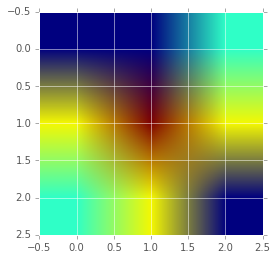

In [17]:
a = dict_num_to_weights[145]
print(a)
plt.imshow(dict_num_to_weights[145])
plt.show()

In [12]:
import pickle as pkl
MyDicts = [dictionary_matrix_to_num, dict_num_to_weights]
pkl.dump( MyDicts, open( "myDicts.p", "wb" ) )
#to read the pickled dicts use:
# dictionary_matrix_to_num, dict_num_to_weights = pkl.load( open ("myDicts.p", "rb") )




In [3]:
a = [(1,2), (3,4)]
a, b = zip(*a)
a

(1, 3)